In [37]:
import numpy as np
import pandas as pd
import os,math
import matplotlib.pyplot as plt
%matplotlib inline

**Data**. 
Frist read the data and prepare it for the proyect.

In [38]:
#The data
corpus_root = 'data/'

coins = list()
coins_names = list()
for coin_file in os.listdir(corpus_root):
   print(coin_file)
   coins_names.append(coin_file.split('.')[0])
   coins.append(pd.read_csv(os.path.join(corpus_root,coin_file)))


Aave.csv
algorand.csv
Ankr.csv
Arweave.csv
avalanche.csv
Axie Infinity.csv
Basic Attention Token.csv
binance coin.csv
bitcoin cash.csv
Bitcoin SV.csv
bitcoin.csv
cardano.csv
Celo.csv
chainlink.csv
Chiliz.csv
Compound.csv
cosmos.csv
crypto.com coin.csv
Current Crypto leaderboard.csv
Curve DAO Token.csv
dai.csv
Dash.csv
decentraland.csv
Decred.csv
dogecoin.csv
elrond.csv
Enjin Coin.csv
EOS.csv
ethereum classic.csv
ethereum.csv
fantom.csv
filecoin.csv
ftx token.csv
Hedera.csv
Horizen.csv
ICON.csv
IOTA.csv
IoTeX.csv
Kadena.csv
Kusama.csv
litecoin.csv
Loopring.csv
Maker.csv
Monero.csv
near protocol.csv
NEM.csv
Neo.csv
OMG Network.csv
PancakeSwap.csv
polkadot.csv
polygon.csv
Qtum.csv
Quant.csv
SHIBA INU.csv
Siacoin.csv
solana.csv
stellar.csv
terra.csv
tether.csv
tezos.csv
the graph.csv
The Sandbox.csv
Theta Fuel.csv
theta.csv
THORChain.csv
tron.csv
TrueUSD.csv
uniswap.csv
usd coin.csv
vechain.csv
Voyager Token.csv
Waves.csv
WAX.csv
wrapped bitcoin.csv
xrp.csv
Zcash.csv


In [39]:
coins[0].head(100)

,Date,Open,High,Low,Close,Volume,Currency
0,2020-10-05,0.528101,0.528101,0.528101,0.528101,879.0,USD
1,2020-10-06,0.528101,0.528101,0.528101,0.528101,879.0,USD
2,2020-10-07,0.528101,0.528101,0.528101,0.528101,879.0,USD
3,2020-10-08,0.528101,0.528101,0.528101,0.528101,879.0,USD
4,2020-10-10,46.818146,51.405655,46.703327,49.133717,1074627.0,USD
...,...,...,...,...,...,...,...
95,2021-06-15,319.400604,326.900909,308.366943,319.757294,352145487.0,USD
96,2021-06-16,311.928223,313.738556,287.531158,290.268494,192278220.0,USD
97,2021-06-17,290.296387,305.388519,285.459717,292.914612,146151226.0,USD
98,2021-06-18,293.533905,293.784607,253.611221,264.352081,229941835.0,USD


In [40]:
print(coins_names)

['Aave', 'algorand', 'Ankr', 'Arweave', 'avalanche', 'Axie Infinity', 'Basic Attention Token', 'binance coin', 'bitcoin cash', 'Bitcoin SV', 'bitcoin', 'cardano', 'Celo', 'chainlink', 'Chiliz', 'Compound', 'cosmos', 'crypto', 'Current Crypto leaderboard', 'Curve DAO Token', 'dai', 'Dash', 'decentraland', 'Decred', 'dogecoin', 'elrond', 'Enjin Coin', 'EOS', 'ethereum classic', 'ethereum', 'fantom', 'filecoin', 'ftx token', 'Hedera', 'Horizen', 'ICON', 'IOTA', 'IoTeX', 'Kadena', 'Kusama', 'litecoin', 'Loopring', 'Maker', 'Monero', 'near protocol', 'NEM', 'Neo', 'OMG Network', 'PancakeSwap', 'polkadot', 'polygon', 'Qtum', 'Quant', 'SHIBA INU', 'Siacoin', 'solana', 'stellar', 'terra', 'tether', 'tezos', 'the graph', 'The Sandbox', 'Theta Fuel', 'theta', 'THORChain', 'tron', 'TrueUSD', 'uniswap', 'usd coin', 'vechain', 'Voyager Token', 'Waves', 'WAX', 'wrapped bitcoin', 'xrp', 'Zcash']


We add a name column to each data frame to identify the coin we are working with

In [41]:
for index,element in enumerate(coins, start=0):
    element['Name'] = coins_names[index]
coins[1].head(100)

,Date,Open,High,Low,Close,Volume,Currency,Name
0,2019-07-25,0.5983,0.6148,0.5860,0.6102,4753925,USD,algorand
1,2019-07-26,0.6103,0.7111,0.5940,0.6503,8947342,USD,algorand
2,2019-07-27,0.6501,0.6673,0.5728,0.5788,9094853,USD,algorand
3,2019-07-28,0.5788,0.5992,0.5584,0.5759,11048324,USD,algorand
4,2019-07-29,0.5770,0.5934,0.5546,0.5710,11034328,USD,algorand
...,...,...,...,...,...,...,...,...
95,2019-10-28,0.2177,0.2397,0.2177,0.2303,2272452,USD,algorand
96,2019-10-29,0.2304,0.2347,0.2218,0.2263,1629597,USD,algorand
97,2019-10-30,0.2263,0.2266,0.2074,0.2109,1533512,USD,algorand
98,2019-10-31,0.2110,0.2230,0.2076,0.2224,1547526,USD,algorand


In [42]:
list_coins = coins[0:10]
print(list_coins)

[           Date        Open        High         Low       Close       Volume  \
0    2020-10-05    0.528101    0.528101    0.528101    0.528101        879.0   
1    2020-10-06    0.528101    0.528101    0.528101    0.528101        879.0   
2    2020-10-07    0.528101    0.528101    0.528101    0.528101        879.0   
3    2020-10-08    0.528101    0.528101    0.528101    0.528101        879.0   
4    2020-10-10   46.818146   51.405655   46.703327   49.133717    1074627.0   
..          ...         ...         ...         ...         ...          ...   
259  2021-11-26  263.117767  263.922913  226.743546  231.711807  373629942.0   
260  2021-11-27  232.490601  243.158722  230.590424  233.101212  207709370.0   
261  2021-11-28  233.152054  238.847565  220.849686  238.847565  244774079.0   
262  2021-11-29  238.995789  250.995270  233.879562  249.625183  248130259.0   
263  2021-11-30  250.208313  263.592834  245.490570  258.770203  364019808.0   

    Currency  Name  
0        USD  Aav

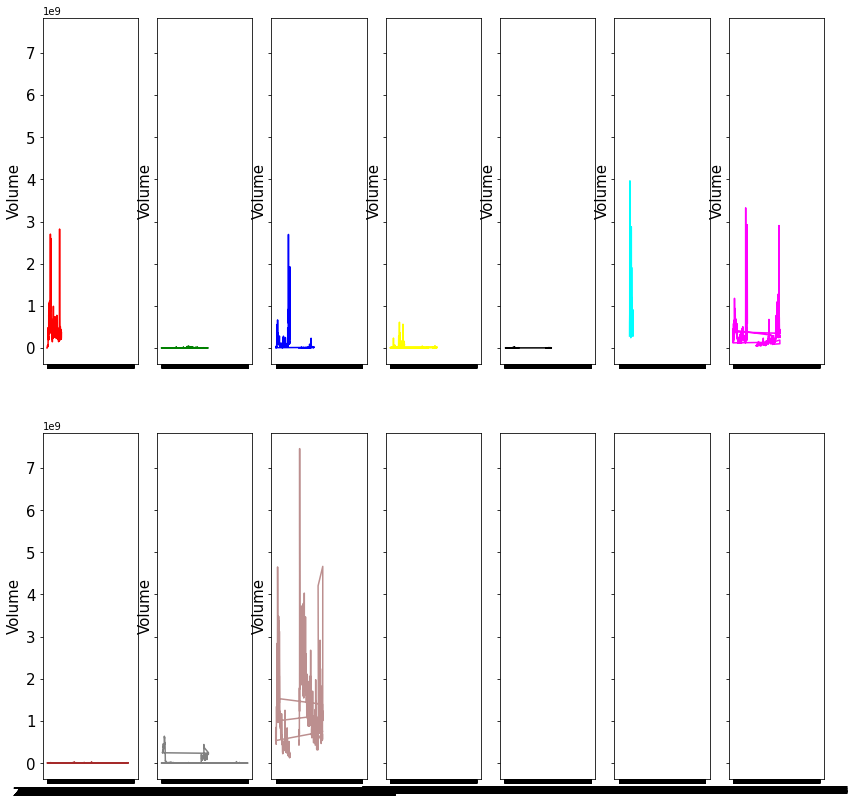

In [48]:
colors=['red','green','blue','yellow','black','cyan','magenta','brown','gray','rosybrown'
        ,'salmon','peachpuff','orange','gold','olive','lime','steelblue','pink','indigo']
COLUMNS = 7
ROWS = math.ceil(10/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(14, 14), sharey=True, sharex=True)

for index,element in enumerate(list_coins, start=0):
    
    current_column = index%COLUMNS
    current_row = index//COLUMNS
    
    ax = axs[current_row, current_column]
    ax.plot(element['Date'],element['Volume'],color=colors[index])
    ax.set_ylabel('Volume', size=15)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=15)